In [30]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
m1 = 1  # [kg]
m2 = 1  # [kg] 

In [4]:
k1 = 1 # [?]

In [8]:
M = np.array([[m1]])
Minv = np.linalg.inv(M)
K = np.array([[k1]])

In [20]:
np.hstack([np.array([1,2,3]), np.array([4,5,6])])

array([1, 2, 3, 4, 5, 6])

In [9]:
Minv

array([[1.]])

In [34]:
def system(t, y):
    n = y.size // 2
    return np.hstack([y[n:2*n], -Minv @ K @ y[0:n]])

In [47]:
t = np.linspace(0, 100, 5000)

In [48]:
solution = integrate.solve_ivp(system, [t.min(), t.max()], y0=[0, 2], t_eval=t)

In [49]:
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 644
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.00040008e-02, 4.00080016e-02, ...,
       9.99599920e+01, 9.99799960e+01, 1.00000000e+02])
 t_events: None
        y: array([[ 0.        ,  0.04000533,  0.07999466, ..., -1.02854333,
        -0.99406987, -0.95920329],
       [ 2.        ,  1.99959985,  1.99839957, ...,  1.71278996,
         1.73301922,  1.75255601]])
 y_events: None

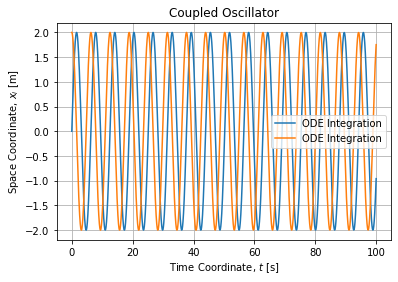

In [51]:
fig, axe = plt.subplots()
axe.plot(t, solution.y.T, label="ODE Integration")
axe.set_title("Coupled Oscillator")
axe.set_xlabel("Time Coordinate, $t$ [s]")
axe.set_ylabel("Space Coordinate, $x_i$ [m]")
axe.grid()
axe.legend()